# Synthetic data iPython Notebook

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import doctest
%load_ext pycodestyle_magic
%flake8_on

1: E999 SyntaxError: invalid syntax


In [2]:
# defining function for generating variables
def generate_normal_variables(mean, varience, samples):
    """
    This fuction returns the a noramlly distributed Numpy array based on the
    sepcify mean, variance and number of samples
    >>> np.random.seed(10)
    >>> generate_normal_variables(5, 10, 5)
    array([9.21084625, 7.26191072, 0.11301518, 4.97348794, 6.96483687])
    """
    standard_deviation = np.sqrt(varience)
    return np.random.normal(mean, standard_deviation, samples)


def generate_discrete_variables(variables, propabilities, samples):
    """""
    This fuctions return a numpy array with discrete distribution of variables
    based on the specify vairables, its relative propablities, and number of
    samples
    >>> np.random.seed(10)
    >>> generate_discrete_variables(['a', 'b', 'c'], [0.1, 0.8, 0.1], 10)
    array(['b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a'], dtype='<U1')
    """""
    return np.random.choice(variables, samples, p=propabilities)


doctest.testmod()

TestResults(failed=0, attempted=4)

In [3]:
# import the CSV file
# source: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/
file_path = 'imports-85.data'
headers = ['symboling', 'normalized losses', 'make', 'fuel type', 'aspiration',
           'num of doors', 'body style', 'drive wheels', 'engine location', 'w'
           + 'heelbase', 'length', 'width', 'height', 'curb weight', 'engine t'
           + 'ype', 'num of cylinders', 'engine size', 'fuel system', 'bore',
           'stroke', 'compression ratio', 'horsepower', 'peak rpm', 'city mpg',
           'highway mpg', 'price']
df = pd.read_csv(file_path, header=None)
df.columns = headers
print(df.shape)
df.head()


(205, 26)


,symboling,normalized losses,make,fuel type,aspiration,num of doors,body style,drive wheels,engine location,wheelbase,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# selecting the variables from Dataframe
pd.set_option('display.max_rows', 1000)
selected_df = df[['make', 'wheelbase', 'horsepower', 'price']]
print(selected_df.shape)
selected_df.head()

(205, 4)


,make,wheelbase,horsepower,price
0,alfa-romero,88.6,111,13495
1,alfa-romero,88.6,111,16500
2,alfa-romero,94.5,154,16500
3,audi,99.8,102,13950
4,audi,99.4,115,17450


In [5]:
selected_df.dtypes

make           object
wheelbase     float64
horsepower     object
price          object
dtype: object

In [6]:
# data cleaning
selected_df.loc[selected_df['horsepower'] == '?', ['horsepower']]

,horsepower
130,?
131,?


In [7]:
selected_df.loc[selected_df['price'] == '?', ['price']]

,price
9,?
44,?
45,?
129,?


In [8]:
selected_df.loc[selected_df['horsepower'] == '?', ['horsepower']] = np.nan
selected_df.loc[selected_df['price'] == '?', ['price']] = np.nan

C:\Users\Ice\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
selected_df['horsepower'] = selected_df[['horsepower']].astype(float)
selected_df['price'] = selected_df[['price']].astype(float)
selected_df.dtypes

<ipython-input-9-3e24def05000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['horsepower'] = selected_df[['horsepower']].astype(float)
<ipython-input-9-3e24def05000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['price'] = selected_df[['price']].astype(float)


make           object
wheelbase     float64
horsepower    float64
price         float64
dtype: object

In [21]:
# conducting necessary analysis on the data
observations = selected_df.shape[0]
make_dictionary = selected_df['make'].value_counts()
brands = make_dictionary.keys().values.tolist()
brands_count = make_dictionary.values
relative_frequency = (brands_count / observations).tolist()
wheelbase_mean = selected_df['wheelbase'].mean(0)
wheelbase_varience = selected_df['wheelbase'].var(0)
horsepower_mean = selected_df['horsepower'].mean(0)
horsepower_varience = selected_df['horsepower'].var(0)
price_mean = selected_df['price'].mean(0)
price_varience = selected_df['price'].var(0)

In [28]:
# generating synthetic data
synthetic_df = pd.DataFrame(columns=['make', 'wheelbase', 'horsepower', 'price'
                                     ])
synthetic_df['make'] = generate_discrete_variables(brands,
                                                   relative_frequency, 100)
synthetic_df['wheelbase'] = generate_normal_variables(wheelbase_mean,
                                                      wheelbase_varience, 100)
synthetic_df['horsepower'] = generate_normal_variables(horsepower_mean,
                                                       horsepower_varience,
                                                       100)
synthetic_df['price'] = generate_normal_variables(price_mean,
                                                  price_varience, 100)
synthetic_df.head(10)

,make,wheelbase,horsepower,price
0,mercedes-benz,106.512980,77.468887,16691.050944
1,saab,91.187115,147.767520,9577.412323
2,nissan,87.796837,70.637029,5150.764897
3,peugot,97.934979,47.745445,11156.159705
4,nissan,85.927628,110.371158,6707.692036
5,mazda,95.261397,151.309953,18228.090277
6,mercedes-benz,94.462649,54.479456,6804.854023
7,alfa-romero,101.973638,126.069717,41889.368934
8,volkswagen,100.525212,131.848474,11465.593519
9,honda,89.089083,80.417602,6562.815730


In [29]:
# saving synthetic data to csv file
synthetic_df.to_csv('synthetic.csv')

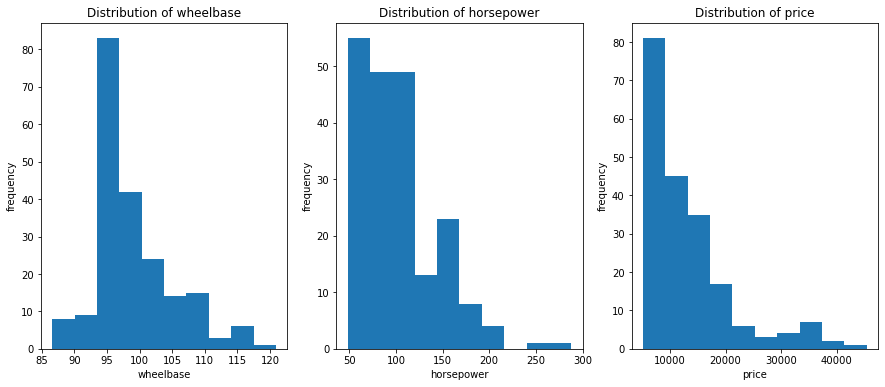

In [30]:
# virtualising the original data
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['wheelbase', 'horsepower', 'price']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=1, wspace=0.2)
    plt.hist(selected_df[x])
    plt.title('Distribution of {}'.format(x))
    plt.xlabel(x)
    plt.ylabel('frequency')
plt.show()

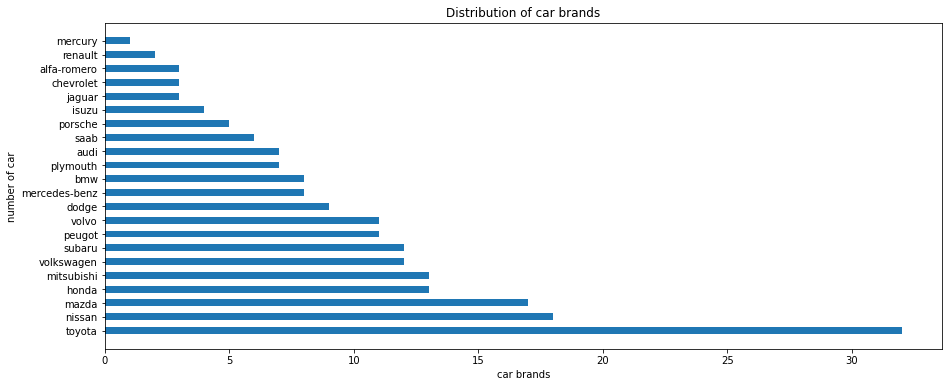

In [31]:
plt.figure(1, figsize=(15, 6))
plt.barh(brands, brands_count, 0.5)
plt.title('Distribution of car brands')
plt.xlabel('car brands')
plt.ylabel('number of car')
plt.show()

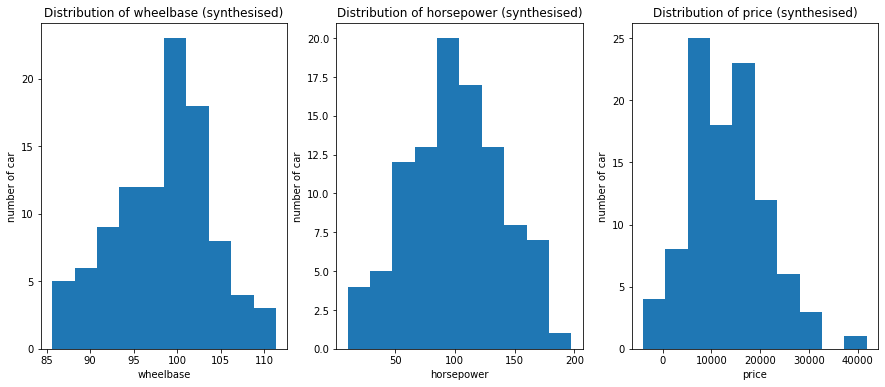

In [32]:
# virtualising the synthetic data
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['wheelbase', 'horsepower', 'price']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=1, wspace=0.2)
    plt.hist(synthetic_df[x])
    plt.title('Distribution of {} (synthesised)'.format(x))
    plt.xlabel(x)
    plt.ylabel('number of car')
plt.show()

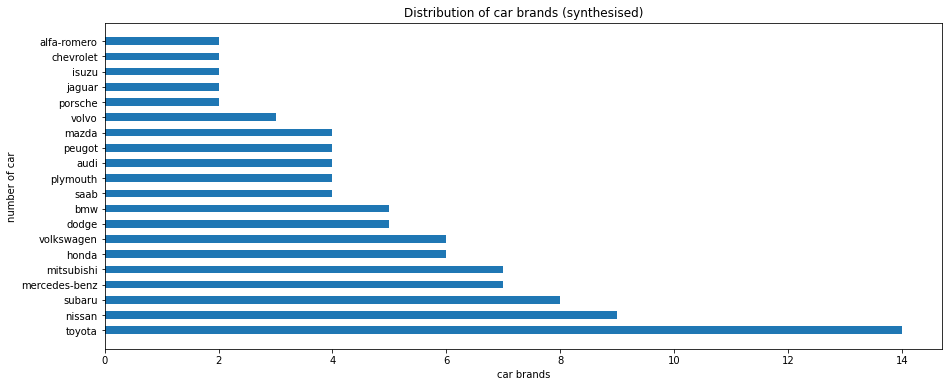

In [33]:
synthetic_make_dictionary = synthetic_df['make'].value_counts()
synthetic_brands = synthetic_make_dictionary.keys().values.tolist()
synthetic_brands_count = synthetic_make_dictionary.values
plt.figure(1, figsize=(15, 6))
plt.barh(synthetic_brands, synthetic_brands_count, 0.5)
plt.title('Distribution of car brands (synthesised)')
plt.xlabel('car brands')
plt.ylabel('number of car')
plt.show()